## 실습 데이터 불러오기

In [35]:
# 실습용 라이브러리 로딩

import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt

In [36]:
# 정규분포로 처리한 데이터 로드하자

data = pd.read_csv('D:/데잇걸즈/covid-data/분석/norm_data_특구시장제외.csv', encoding = "utf-8")

In [37]:
data.head()

,상권코드명,유동인구,직장인구,집객시설,상주인구,점포수
0,가로공원로58길,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,가로공원로76가길,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,가로공원로80길,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,가마산로61길,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
4,가산디지털단지역_1,-1.067718,3.037919,0.353833,-1.386092,0.671761


In [38]:
# float 형태의 데이터만 있어야 아래 실루엣 점수나 엘보우 포인트가 가능한 것 같다
# 그래서 상권코드명은 나중에 테이블을 합쳐주는걸로 해야겠다. 

data = data[['유동인구','직장인구','집객시설','상주인구','점포수']]

In [39]:
data

,유동인구,직장인구,집객시설,상주인구,점포수
0,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
4,-1.067718,3.037919,0.353833,-1.386092,0.671761
...,...,...,...,...,...
1245,0.338236,-0.272745,-0.455413,0.359444,-0.381245
1246,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1247,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1248,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012


In [40]:
data.shape

(1250, 5)

In [41]:
data.describe()

,유동인구,직장인구,집객시설,상주인구,점포수
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.093461,0.010156,0.007605,0.141378,-0.030827
std,0.953793,0.818506,0.877520,0.972354,0.578080
min,-1.240753,-0.292012,-0.584893,-1.403499,-0.445064
25%,-0.488671,-0.260771,-0.390674,-0.586606,-0.271792
50%,-0.090020,-0.226632,-0.228824,0.036377,-0.181812
75%,0.459127,-0.089128,0.030134,0.739953,-0.038338
max,11.087252,8.765239,12.557269,6.083439,7.503632


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   유동인구    1250 non-null   float64
 1   직장인구    1250 non-null   float64
 2   집객시설    1250 non-null   float64
 3   상주인구    1250 non-null   float64
 4   점포수     1250 non-null   float64
dtypes: float64(5)
memory usage: 49.0 KB


## 클러스터링

In [43]:
# 일단 사이킷런의 KMeans 를 불러옴
# n_clusters 부분에 클러스터 갯수를 작성하면 된다

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [44]:
kmeans.fit(data)

KMeans(n_clusters=6)

In [45]:
cluster = kmeans.predict(data)

In [46]:
# 클러스터 나누기 완료. array 형태로 저장된다
cluster

array([4, 4, 4, ..., 4, 3, 4])

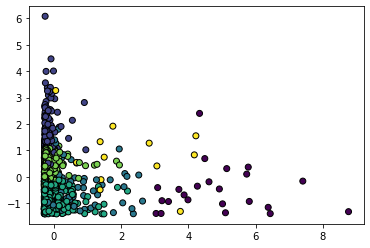

In [47]:
# 시각화는 2차원까지밖에 안된다.
# 시각화를 쓰기 위해선 차원 축소(PCA)를 거쳐야 함
# 차원축소를 해서 2차원 평면에 그릴때, 스캐터플롯 상에서 그리기 어려운게 많은거같음

plt.scatter(data['직장인구'], data['상주인구'], c=cluster, linewidth=1, edgecolor='black')
plt.show()

## 가장 적합한 클러스터 개수 찾기

### 실루엣 점수

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

## 엘보우 포인트

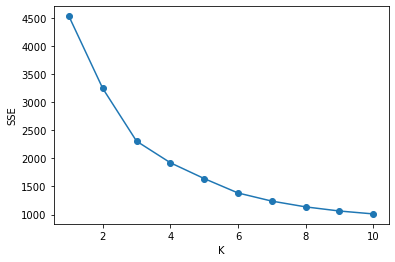

In [48]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(data)

## 클러스터화 된 array를 데이터프레임으로 변환

In [49]:
df_cl = pd.DataFrame(cluster,columns=["cluster"])
df_cl

,cluster
0,4
1,4
2,4
3,4
4,0
...,...
1245,4
1246,3
1247,4
1248,3


In [50]:
df_cl.describe()

,cluster
count,1250.000000
mean,3.011200
std,1.146528
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [51]:
data

,유동인구,직장인구,집객시설,상주인구,점포수
0,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
4,-1.067718,3.037919,0.353833,-1.386092,0.671761
...,...,...,...,...,...
1245,0.338236,-0.272745,-0.455413,0.359444,-0.381245
1246,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1247,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1248,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012


In [52]:
final = pd.concat([data, df_cl],axis=1)

In [54]:
need_name = pd.read_csv('D:/데잇걸즈/covid-data/분석/norm_data_특구시장제외.csv', encoding = "utf-8")

In [55]:
need_name

,상권코드명,유동인구,직장인구,집객시설,상주인구,점포수
0,가로공원로58길,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,가로공원로76가길,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,가로공원로80길,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,가마산로61길,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
4,가산디지털단지역_1,-1.067718,3.037919,0.353833,-1.386092,0.671761
...,...,...,...,...,...,...
1245,휘경로23길,0.338236,-0.272745,-0.455413,0.359444,-0.381245
1246,휘경로2길,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1247,휘경로3길,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1248,흑석로13길,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012


In [56]:
need_name = need_name[['상권코드명']]

In [57]:
need_name

,상권코드명
0,가로공원로58길
1,가로공원로76가길
2,가로공원로80길
3,가마산로61길
4,가산디지털단지역_1
...,...
1245,휘경로23길
1246,휘경로2길
1247,휘경로3길
1248,흑석로13길


In [58]:
final = pd.concat([need_name, final],axis=1)

In [59]:
final.to_excel('final.xlsx')